In [5]:
import pandas as pd
import numpy as np
import sqlite3

import requests
from IPython.display import YouTubeVideo

In [43]:
def get_conn():
    db_name = './movie_sqlite.db'
    conn = sqlite3.connect(db_name)
    return conn

In [45]:
df = pd.read_csv('./video_urls.csv').replace('NONE', np.nan)
df['yt_video_id'] = df['video_url'].str[9:]
df = df[['id', 'yt_video_id']].set_index('id')
df.head()

,yt_video_id
id,
tt0004972,a9UPOkIpR0A
tt0006333,YxxdvXLzwxc
tt0006864,QzNL5JRTI6I
tt0009968,8JzhhUCo1xY
tt0010040,Hta6qKrcaYw


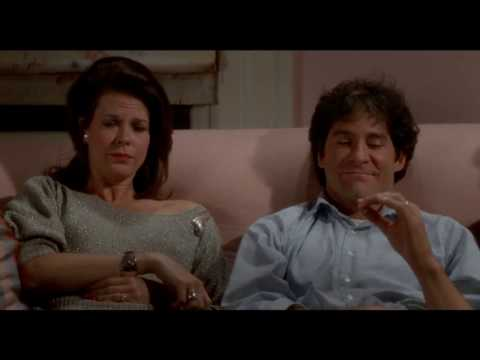

In [40]:
YouTubeVideo(df.iloc[np.random.randint(0,df.shape[0]),:]['yt_video_id'], width=400, height=250)

In [46]:
conn = get_conn()
df.to_sql('trailers', conn)

In [47]:
def get_trailer(fk_id):    
    sql = f'''
        select yt_video_id
        from trailers
        where id = '{fk_id}'
    ;
    '''
    conn = get_conn()
    c = conn.cursor()
    c.execute(sql)
    res = c.fetchall()[0][0]
    return res

iX8GxLP1FHo


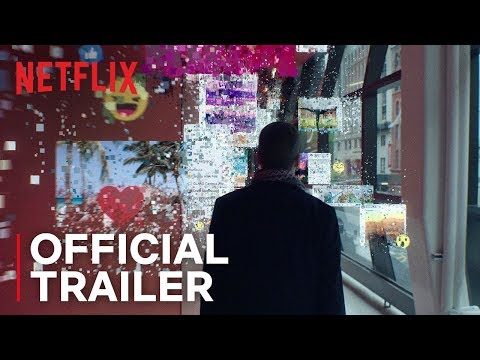

In [49]:
yt_video_id = get_trailer('tt9358204')
print(yt_video_id)
YouTubeVideo(yt_video_id, width=400, height=250)